In [1]:
# importing required libraries
import pandas as pd
import numpy as np
# for standarization of numerical columns in data frame
from scipy.stats import zscore
import random
from sklearn.preprocessing import StandardScaler
# for visualization
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# to split data
from sklearn.model_selection import train_test_split
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for hypothesis testing
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
# for model building
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# for performance evaluation of models
from sklearn import metrics

# Data Preprocessing

In [123]:
data = pd.read_csv('hour.csv', parse_dates = [1])  # reading the data, reading the date column in datetime format

In [124]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.shape

(17379, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [7]:
# Changing data types
data['season'] = data['season'].astype('category')
data['yr'] = data['yr'].astype('category')
data['mnth'] = data['mnth'].astype('category')
data['hr'] = data['hr'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

In [8]:
data.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Exploratory Data Analysis

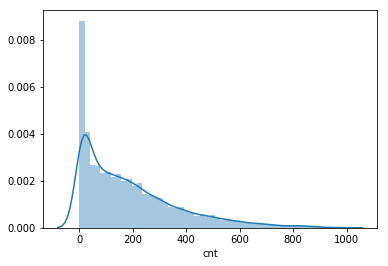

In [9]:
sns.distplot(data.cnt)

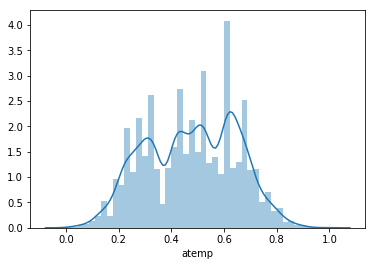

In [10]:
sns.distplot(data.atemp)

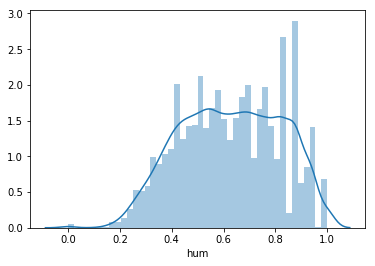

In [11]:
sns.distplot(data.hum)

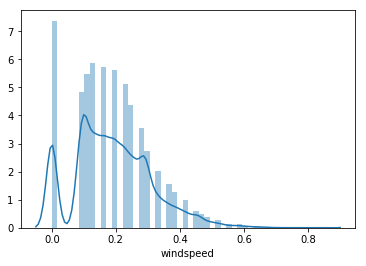

In [12]:
sns.distplot(data.windspeed)

[Text(0.5,1,'Season wise hourly distribution of counts')]

<Figure size 792x360 with 0 Axes>

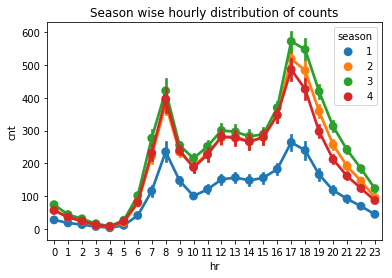

In [13]:
plt.figure(figsize=(11,5))
fig,ax = plt.subplots()
sns.pointplot(data=data[['hr', 'cnt', 'season']], x='hr', y='cnt', hue='season', ax=ax)
ax.set(title="Season wise hourly distribution of counts")

#### Across all the seasons, the trend of hourly count of bikes rented is approximately the same.
#### Spring season has lesser customers as compared with the other seasons.

[Text(0.5,1,'Weekday wise hourly distribution of counts')]

<Figure size 792x360 with 0 Axes>

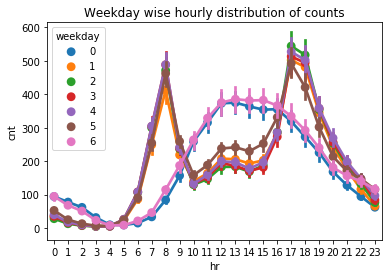

In [14]:
plt.figure(figsize=(11,5))
fig,ax = plt.subplots()
sns.pointplot(data=data[['hr', 'cnt', 'weekday']], x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

#### The highs and lows of the rental count have different trends on weekdays and weekends.

[Text(0.5,1,'Seasonal distribution of counts')]

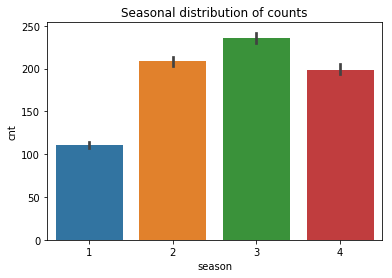

In [15]:
fig,ax = plt.subplots()
sns.barplot(data=data[['season', 'cnt']], x='season', y='cnt', ax=ax)
ax.set(title="Seasonal distribution of counts")

#### Another visual proving the customer count to be the least in spring i.e during january, feburary and march.

[Text(0.5,1,'Monthly distribution of counts')]

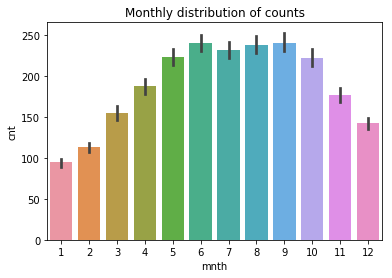

In [16]:
fig,ax = plt.subplots()
sns.barplot(data = data[['mnth','cnt']], x='mnth', y='cnt', ax=ax)
ax.set(title="Monthly distribution of counts")

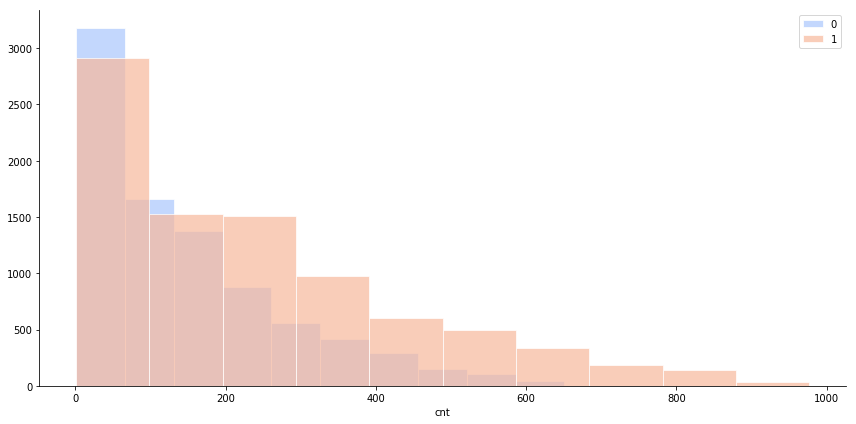

In [17]:
g = sns.FacetGrid(data, hue='yr', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'cnt', alpha=0.7, edgecolor='w')
plt.legend()

Text(0.5,1,'Number of bikes rented per season')

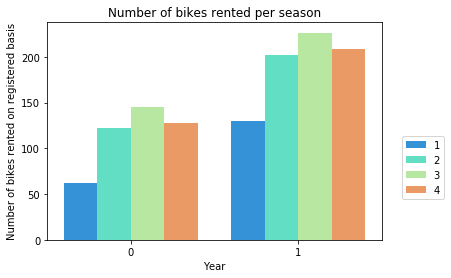

In [18]:
sns.barplot('yr','registered', hue = 'season', data = data, palette = 'rainbow', ci = None)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Number of bikes rented on registered basis')
plt.title('Number of bikes rented per season')

Text(0.5,1,'Number of bikes rented per season')

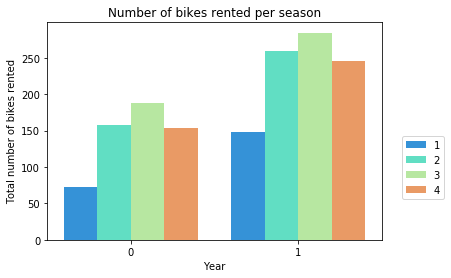

In [19]:
sns.barplot('yr','cnt', hue = 'season', data = data, palette = 'rainbow', ci = None)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

#### From above, we can infer that customers are increasing over the year. However, the trend for number of bikes rented based on seasons is the same in both the years.

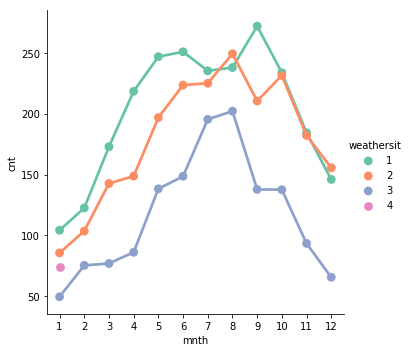

In [20]:
sns.factorplot('mnth', 'cnt', hue = 'weathersit', data = data, ci = None, palette = 'Set2')

#### People enjoy renting and riding bikes when the weather is clear.

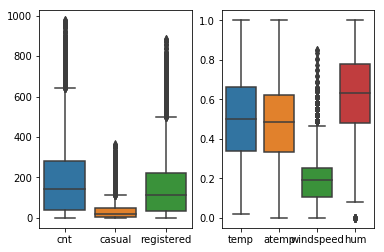

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data = data[['cnt', 'casual', 'registered']],ax = ax1)
sns.boxplot(data = data[['temp', 'atemp', 'windspeed', 'hum']],ax = ax2)

#### Total count, registered count, casual count, windspeed and humidity have outliers.

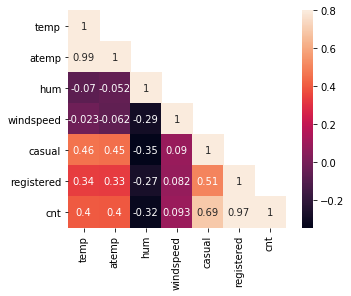

In [22]:
corrMatt = data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True, ax=ax)

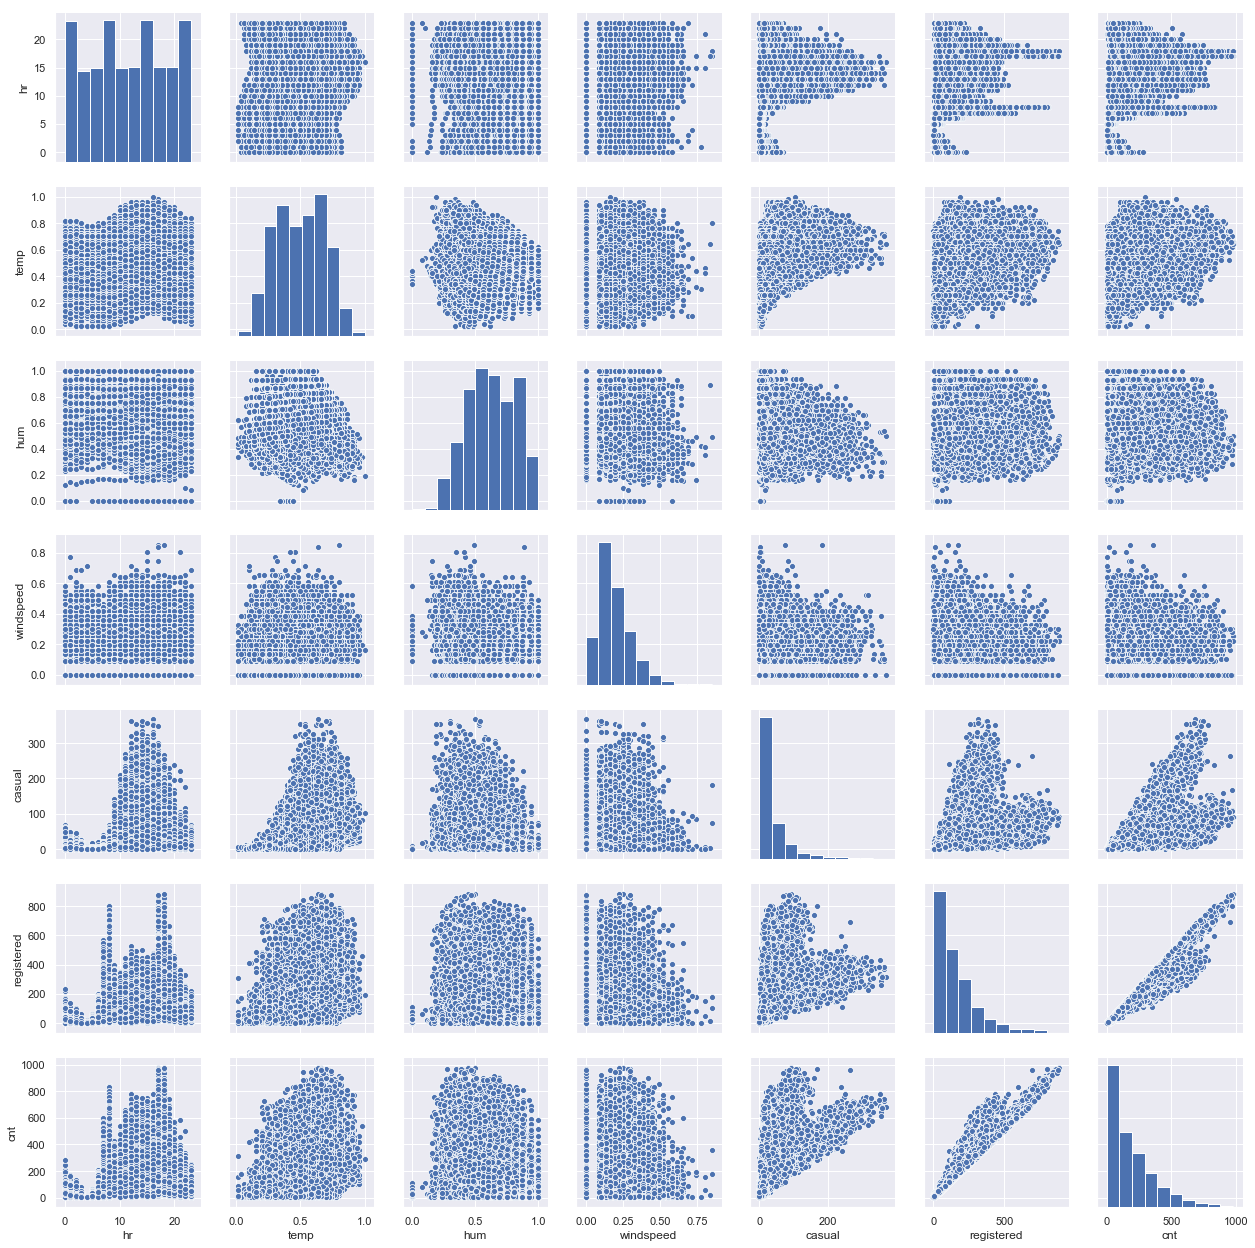

In [23]:
sns.set()
sns.pairplot(data, vars = [ 'hr', 'temp', 'hum', 'windspeed', 'casual', 'registered','cnt'])

# Hypothesis Testing

In [24]:
# Null Hypothesis: There is no dependency between bike rental count and season.
# Alternate Hypothesis: There is dependency between bike rental count and season.

model1 = ols('cnt ~ season', data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model1, typ=2)
print(aov_table)

                sum_sq       df           F         PR(>F)
season    3.772936e+07      3.0  409.181037  7.401071e-257
Residual  5.340322e+08  17375.0         NaN            NaN


##### As season variance is same, we are testing with 1 way ANOVA. 
##### By observing p-value 7.4e-257 (< 0.05), we can reject null hypothesis i.e there is  significant dependency between season & count .

In [25]:
# Null Hypothesis: There is no dependency between bike rental count and Weather condition.
# Alternate Hypothesis: There is  dependency between bike rental count and Weather condition.

model2 = ols('cnt ~ weathersit', data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model2, typ=2)
print(aov_table)

                  sum_sq       df           F        PR(>F)
weathersit  1.228503e+07      3.0  127.173869  1.734782e-81
Residual    5.594766e+08  17375.0         NaN           NaN


##### The p-value (1.73e-81) is less than < 0.05, hence, we can reject null hypothesis. There is  significant dependency between weather & count .

In [125]:
# Null Hypothesis: There is no dependency between bike rental count with respect to weekday and month.
# Alternate Hypothesis: There is  dependency between bike rental count with respect to weekday and month.

model3 = ols('cnt ~ weekday ', data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model3, typ=2)
print(aov_table)

                sum_sq       df          F   PR(>F)
weekday   4.137281e+05      1.0  12.583145  0.00039
Residual  5.713479e+08  17377.0        NaN      NaN


##### The p-values for both weekday and month are lesser than 0.05, i.e. we can reject the null hypothesis. Hence, there is significance dependency of the total bike rental count on weekday and month.

In [27]:
# Null Hypothesis: There is no dependency between the total bike rental count and casual count.
# Alternate Hypothesis: There is dependency between the total bike rental count and casual count.

model4 = ols('cnt ~ casual', data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model4, typ=2)
print(aov_table)

                sum_sq       df             F  PR(>F)
casual    2.758288e+08      1.0  16196.505743     0.0
Residual  2.959328e+08  17377.0           NaN     NaN


##### By observing p-value 0.0 (< 0.05), we can reject null hypothesis i.e there is  significant dependency between the total bike rental count and casual count.

In [28]:
# Null Hypothesis: There is no dependency between the total bike rental count and registered count.
# Alternate Hypothesis: There is dependency between the total bike rental count and registered count.

model5 = ols('cnt ~ registered', data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model5, typ=2)
print(aov_table)

                  sum_sq       df              F  PR(>F)
registered  5.403588e+08      1.0  299011.649004     0.0
Residual    3.140284e+07  17377.0            NaN     NaN


##### Since the p-value(0.0) is less than 0.05, we can reject null hypothesis i.e, there is  significant dependency between the total bike rental count and registered count.

# Feature Engineering

### Missing Values Imputation

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.3 MB


##### There are no missing values in the data.

### Outlier Treatment

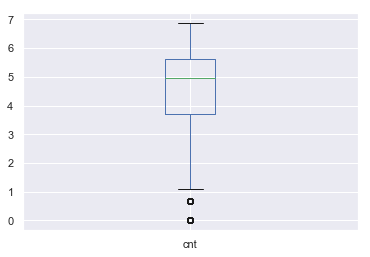

In [30]:
data['cnt'] = np.log(data['cnt'])
data['cnt'].plot(kind = 'box')

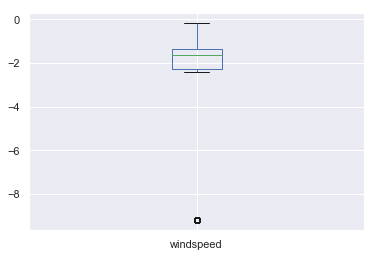

In [31]:
data['windspeed'] = data.windspeed.replace({0:0.0001})
data['windspeed'] = np.log(data['windspeed'])
data['windspeed'].plot(kind = 'box')

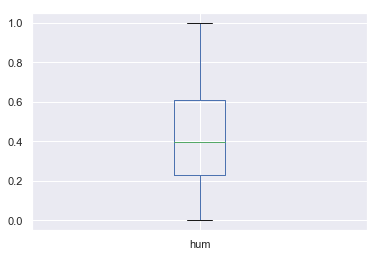

In [32]:
data['hum'] = data.hum.replace({0.0:0.0001})
data['hum'] = np.square(data['hum'])
data['hum'].plot(kind = 'box')

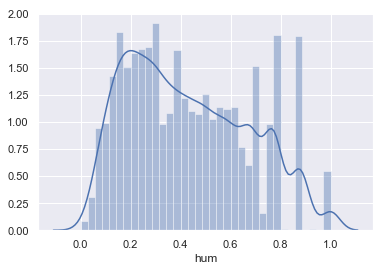

In [33]:
sns.distplot(data.hum)

### Label Encoding

In [34]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.6561,-9.21034,3,13,2.772589
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.6400,-9.21034,8,32,3.688879
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.6400,-9.21034,5,27,3.465736
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.5625,-9.21034,3,10,2.564949
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.5625,-9.21034,0,1,0.000000


In [35]:
data.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                  float64
dtype: object

##### All the categorical columns already have dummy variables.

### Dropping Undesired Columns

In [36]:
data = data.drop(columns = ['dteday','instant', 'casual', 'registered'], axis = 1)

In [37]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.6561,-9.21034,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.6400,-9.21034,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.6400,-9.21034,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.5625,-9.21034,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.5625,-9.21034,0.000000


##### Dropping instant since it is the index. Dropping casual count and registered count since we are predicting the total count.

### Making New Columns

#### Hour Buckets

In [38]:
# Adding an hour-bucket column, hours of the day been divided into low, medium and peak business hours
data['hr_bkt'] = data['hr']

low = [0,1,2,3,4,5,6,23]
med = [10,11,12,13,14,15,21,22]
hig = [7,8,9,16,17,18,19,20]

for i in range(len(data.hr_bkt)):
    for j in low:
        if i == j:
            data.hr_bkt.replace(j,0, inplace = True)
    for k in med:
        if i == k:
            data.hr_bkt.replace(k,1, inplace = True)
    for n in hig:
        if i == n:
            data.hr_bkt.replace(n,2, inplace = True)
data.hr_bkt.head(24)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     2
8     2
9     2
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    2
21    1
22    1
23    0
Name: hr_bkt, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

#### Mean Temperature

In [39]:
data['mean_temp'] = (data['temp'] + data['atemp'])/2

In [40]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hr_bkt,mean_temp
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.6561,-9.21034,2.772589,0,0.26395
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.6400,-9.21034,3.688879,0,0.24635
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.6400,-9.21034,3.465736,0,0.24635
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.5625,-9.21034,2.564949,0,0.26395
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.5625,-9.21034,0.000000,0,0.26395


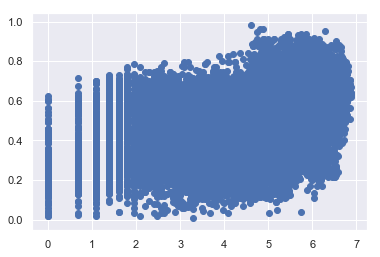

In [116]:
plt.scatter(data.cnt,data.mean_temp)

In [117]:
data.cnt.corr(data.mean_temp)

0.3854456506029614

### Train-Test Split

In [41]:
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'hr_bkt',
       'mean_temp'],
      dtype='object')

In [42]:
X = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

In [43]:
train, test = train_test_split(data, test_size = 0.3, random_state = 1)

In [44]:
train.shape, test.shape

((12165, 15), (5214, 15))

### Normalisation

In [45]:
df = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'mean_temp']]
scaled_df = df.apply(zscore)
train = train.drop(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'mean_temp'], axis = 1 )
train = pd.concat([train, scaled_df], axis = 1)

In [46]:
df2 = test[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'mean_temp']]
scaled_df2 = df2.apply(zscore)
test = test.drop(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'mean_temp'], axis = 1 )
test = pd.concat([test, scaled_df2], axis = 1)

In [47]:
X_train_org = train.drop(['cnt', 'hr_bkt', 'temp', 'atemp'], axis = 1)
y_train = train['cnt']
X_test_org = test.drop(['cnt', 'hr_bkt', 'temp', 'atemp'], axis = 1)
y_test = test['cnt']                                                   # train and test with original columns

In [48]:
X_train_ed = train.drop(['cnt', 'hr', 'temp', 'atemp'], axis = 1)
X_test_ed = test.drop(['cnt', 'hr', 'temp', 'atemp'], axis = 1)        # train and test with engineered columns

In [49]:
X_train_org.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,mean_temp
16408,4,1,11,10,0,3,1,1,-0.196272,-2.582392,-0.644805
6968,4,0,10,23,0,6,0,1,0.994081,-2.582392,-0.547885
9080,1,1,1,6,0,4,1,1,-0.579830,0.310685,-1.976830
5385,3,0,8,7,0,3,1,1,-0.038798,0.073988,0.852896
11361,2,1,4,14,0,1,1,3,-0.196272,0.702721,-0.812136


# Model Building

### Linear Regression (Manual Model Making)

In [50]:
dataX = X_train_org[X_train_org.columns.difference(['cnt'])]
X = dataX.astype(float)
y = np.asarray(train.cnt)                                     # inputting the original columns in step-wise selection

In [51]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  hum                            with p-value 0.0
Add  hr                             with p-value 0.0
Add  mean_temp                      with p-value 0.0
Add  yr                             with p-value 2.62182e-94
Add  season                         with p-value 5.29449e-55
Add  weekday                        with p-value 2.47835e-05
Add  weathersit                     with p-value 0.00269257
Add  holiday                        with p-value 0.00387251
Add  workingday                     with p-value 0.00529653
resulting features:
['hum', 'hr', 'mean_temp', 'yr', 'season', 'weekday', 'weathersit', 'holiday', 'workingday']


In [52]:
lin_model1 = ols('cnt ~ hum + hr + yr + season + weekday + mean_temp + weathersit + holiday + workingday ', data=train).fit() 
print(lin_model1.summary())    # fitting a model with the result of step-wise selection

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1449.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        11:37:30   Log-Likelihood:                -6718.5
No. Observations:               12165   AIC:                         1.352e+04
Df Residuals:                   12125   BIC:                         1.381e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8415      0.024    -

In [53]:
variables1 = lin_model1.model.exog
vif1 = [variance_inflation_factor(variables1, i) for i in range(variables1.shape[1])]
vif1

[39.47118255118568,
 1.9363807104279225,
 1.9333636236986795,
 1.8916658451429333,
 1.9483710874567595,
 1.9551974038624078,
 1.9354166400752149,
 1.9227187962587053,
 1.9096540955741805,
 1.9255068714029577,
 2.0012812706136223,
 1.98949101280686,
 2.01841281902423,
 2.033538676563916,
 2.0678390872669867,
 2.0429680563915205,
 2.0358413537786197,
 2.004440511979697,
 2.0120229191166135,
 1.9624409990424927,
 1.9547347077992625,
 1.9680347499680386,
 1.9333934185866846,
 1.930378627028363,
 1.0194358830097272,
 2.491769984245092,
 4.105750306198402,
 1.812182363422767,
 inf,
 inf,
 inf,
 inf,
 inf,
 1.7151068024950291,
 1.1987077655077434,
 1.3311731536599558,
 1.004502556462399,
 inf,
 inf,
 1.74545322901935,
 3.01930310929889]

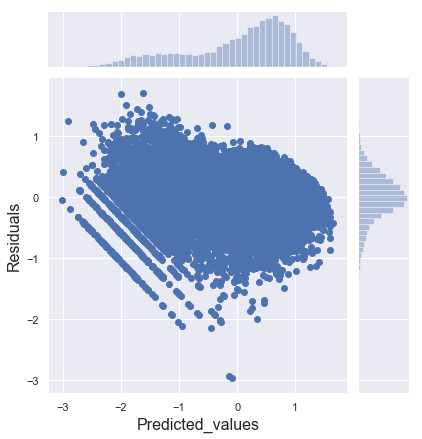

In [54]:
#Residual plot
sns.jointplot( lin_model1.predict(), lin_model1.resid ).set_axis_labels('Predicted_values', 'Residuals', fontsize=16)

((array([-3.8587802 , -3.63627882, -3.51424486, ...,  3.51424486,
          3.63627882,  3.8587802 ]),
  array([-2.9689975 , -2.92930181, -2.15033719, ...,  1.51354622,
          1.68974092,  1.71241052])),
 (0.41484858064032193, -1.6144329596449096e-16, 0.9866062408416466))

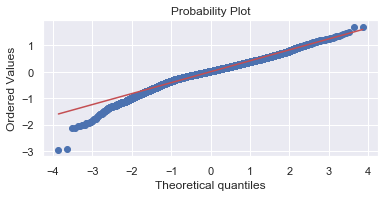

In [55]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(lin_model1.resid, plot=ax, fit=True)

In [56]:
lin_model2 = ols('cnt ~ hum + hr + yr + season + weekday +  mean_temp + weathersit ', data=train).fit()  # removing holdiday and workingday
print(lin_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1483.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        11:37:34   Log-Likelihood:                -6731.1
No. Observations:               12165   AIC:                         1.354e+04
Df Residuals:                   12126   BIC:                         1.383e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8429      0.024    -

In [57]:
variables2 = lin_model2.model.exog
vif2 = [variance_inflation_factor(variables2, i) for i in range(variables2.shape[1])]
vif2

[39.466389226868934,
 1.9363807103633983,
 1.9333560719387957,
 1.8916651902789967,
 1.9483708875436705,
 1.9551962650890629,
 1.9354118730320067,
 1.9226733935061298,
 1.9096538134158128,
 1.9254585965023605,
 2.0012811507600046,
 1.989462406977428,
 2.018412697455147,
 2.0335294050583608,
 2.0678259656656226,
 2.0428409522861064,
 2.035826201084999,
 2.0044313136318217,
 2.012017774065945,
 1.96237367933202,
 1.9546551519369515,
 1.9680347212036797,
 1.9333265287207848,
 1.9303782538451917,
 1.0194085904441932,
 2.4891262471854683,
 4.103855993744786,
 1.8121022835737421,
 1.7052755607644967,
 1.6825438749638564,
 1.706197586513194,
 1.68669964726537,
 1.7090309821322103,
 1.7151062936115422,
 1.1985817630199782,
 1.3302555190417353,
 1.0045001274592862,
 1.7454451106029736,
 3.019303108802318]

In [58]:
lin_pred = lin_model2.predict(X_test_org)

In [59]:
print(metrics.mean_absolute_error(y_test, lin_pred))                 # Mean Absolute Error
print(np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))         # Root Mean Squared Error (RMSE)

0.31506490291557193
0.42444791730972614


In [60]:
dataX2 = X_train_ed[X_train_ed.columns.difference(['cnt'])]
X2 = dataX2.astype(float)
y = np.asarray(train.cnt)                                     # inputting the engineered columns in step-wise selection

In [61]:
X2.hr_bkt.unique()

array([1., 0., 2.])

In [62]:
def stepwise_selection(X2, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X2.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X2[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X2[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X2, y)

print('resulting features:')
print(result)

Add  hum                            with p-value 0.0
Add  hr_bkt                         with p-value 0.0
Add  mean_temp                      with p-value 0.0
Add  yr                             with p-value 1.08437e-140
Add  season                         with p-value 4.84518e-84
Add  holiday                        with p-value 3.1919e-05
Add  workingday                     with p-value 0.00010337
Add  weekday                        with p-value 0.000175112
resulting features:
['hum', 'hr_bkt', 'mean_temp', 'yr', 'season', 'holiday', 'workingday', 'weekday']


In [63]:
lin_model3 = ols('cnt ~ hum + hr_bkt + mean_temp + yr + season + weekday + holiday + workingday', data=train).fit()  # removing windspeed
print(lin_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1819.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        11:37:37   Log-Likelihood:                -10099.
No. Observations:               12165   AIC:                         2.023e+04
Df Residuals:                   12149   BIC:                         2.035e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2378      0.021    -

In [64]:
variables3 = lin_model3.model.exog
vif3 = [variance_inflation_factor(variables3, i) for i in range(variables3.shape[1])]
vif3

[18.052594790228266,
 1.5774813356503978,
 1.4700781585799507,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0147602283909332,
 2.441396925970284,
 3.950524139853384,
 1.8029028800421536,
 inf,
 inf,
 inf,
 inf,
 inf,
 1.712662063560546,
 inf,
 inf,
 1.1756143450941177,
 2.7922396397025375]

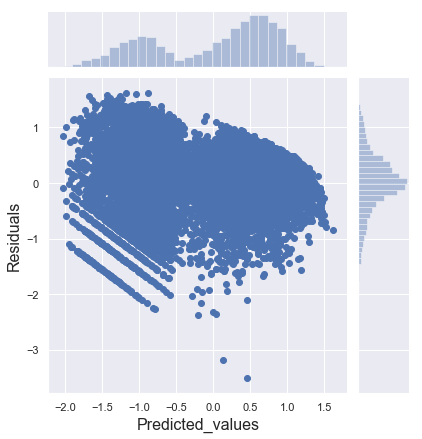

In [65]:
#Residual plot
sns.jointplot( lin_model3.predict(), lin_model3.resid ).set_axis_labels('Predicted_values', 'Residuals', fontsize=16)

((array([-3.8587802 , -3.63627882, -3.51424486, ...,  3.51424486,
          3.63627882,  3.8587802 ]),
  array([-3.51316538, -3.19293772, -2.38310128, ...,  1.59666051,
          1.61499582,  1.6272524 ])),
 (0.5494760017378311, 1.774147135431883e-14, 0.9897464740883607))

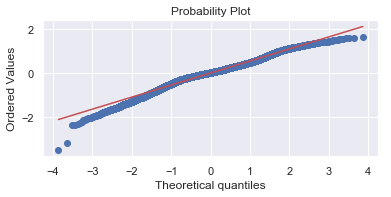

In [66]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(lin_model3.resid, plot=ax, fit=True)

#### Since the adjusted-r square value we are getting on using the data with engineered features is quite lower as compared to when we are using the original features, we will now use just the orginal features, i.e. the X_train_org and the X_test_org.

### Lasso and Ridge

In [67]:
ridge = Ridge(alpha = .03)
ridge.fit(X_train_org, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.09786226  0.27828724  0.00127347  0.06899962 -0.13691391  0.01251911
 -0.03988012  0.03253739 -0.20538213  0.01646048  0.26671933]


In [68]:
pred_rid = ridge.predict(X_test_org)

In [69]:
print(metrics.mean_absolute_error(y_test, pred_rid))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_rid))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_rid)))         # Root Mean Squared Error (RMSE)

0.5644087116039072
0.47619592019026435
0.7237431034626414


In [70]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_org,y_train)
print ("Lasso model:", (lasso.coef_))

# As can be observed, many of the coefficients have become 0 indicating drop of those dimensions from the model.

Lasso model: [ 0.          0.          0.01802337  0.07235005 -0.          0.
 -0.         -0.         -0.10396188  0.          0.19496645]


In [71]:
pred_las = lasso.predict(X_test_org)

In [72]:
print(metrics.mean_absolute_error(y_test, pred_las))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_las))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_las)))         # Root Mean Squared Error (RMSE)

0.5997798725244673
0.42927475903326806
0.755463593409194


In [73]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)         # poly = PolynomialFeatures(2)

In [74]:
X_train_poly = poly.fit_transform(X_train_org)
X_test_poly = poly.fit_transform(X_test_org)

In [75]:
lasso2 = Lasso(alpha = 0.01)
lasso2.fit(X_train_poly,y_train)
print ("Lasso model:", (lasso2.coef_))

Lasso model: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  6.15271764e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.34147357e-02  0.00000000e+00  1.89641594e-01
  4.75043943e-03  1.30127387e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.13651679e-02  0.00000000e+00 -1.84588736e-03
  0.00000000e+00 -9.61377475e-03  0.00000000e+00  1.03794965e-02
  0.00000000e+00  2.90869764e-02  0.00000000e+00  1.25460044e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.14127433e-03
 -1.25790286e-02 -1.40739093e-03 -0.00000000e+00  4.97995568e-03
 -1.92578936e-02  1.77481702e-03  8.50248211e-03 -0.00000000e+00
  3.57060699e-04  1.53388534e-02 -1.15924770e-03  8.52229477e-04
  2.54873793e-04  4.19152752e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.07544689e-04
  3.26559666e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.71377826

In [76]:
pred_las2 = lasso2.predict(X_test_poly)

In [77]:
print(metrics.mean_absolute_error(y_test, pred_las2))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_las2))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_las2)))         # Root Mean Squared Error (RMSE)

0.5591488561372231
0.4827080913706062
0.7192300804536708


In [78]:
ridge2 = Ridge(alpha=.3)
ridge2.fit(X_train_poly, y_train)
print ("Ridge model:", (ridge2.coef_))

Ridge model: [ 0.00000000e+00 -1.46716449e-01  2.74940233e-01  5.96699402e-03
  5.42079497e-02  1.31810739e-01  2.60670932e-02 -3.65886201e-01
  4.41834622e-02 -2.80552763e-01  5.66605337e-02  4.86349147e-01
 -1.98847968e-02  1.66858249e-02  1.32538575e-03  1.83881509e-02
 -3.81017646e-03 -7.54370804e-02  4.96081281e-02 -3.59555614e-03
  4.26159817e-03 -9.25928308e-02 -2.89345412e-03  3.12495184e-03
 -3.14855729e-02  1.00504280e-02 -3.00539048e-03  9.29841777e-04
 -8.87720277e-03  5.91045349e-03 -4.08735579e-02 -1.11370658e-03
 -5.21712444e-03 -1.06876301e-03  2.35557646e-02 -8.04145531e-03
 -1.32343339e-02 -1.30126134e-03  2.13847916e-02  5.65306971e-03
  3.68832702e-04  2.93729275e-02 -4.28914537e-03  5.31715805e-03
  5.05592608e-04 -4.24766544e-03 -8.75450259e-02  0.00000000e+00
 -1.00244600e-01  5.00208482e-02  8.52036614e-03  5.71569789e-03
  1.71754180e-02 -7.67744842e-03  1.20527728e-02 -3.07243371e-03
 -1.28568406e-04 -2.19444837e-02  9.43655462e-02  2.50042304e-02
 -1.15778148

In [79]:
pred_rid2 = ridge2.predict(X_test_poly)

In [80]:
print(metrics.mean_absolute_error(y_test, pred_rid2))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_rid2))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_rid2)))         # Root Mean Squared Error (RMSE)

0.549671113903958
0.49301148559289365
0.7120312594311476


### Decision Tree Regressor

In [81]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [118]:
dt.fit(X_train_org, y_train)
pred_dt = dt.predict(X_test_org)
pred_dt2 = dt.predict(X_train_org)

In [119]:
print(metrics.r2_score(y_train, pred_dt2))                            # R-Squared

0.9999967257829403


In [83]:
print(metrics.mean_absolute_error(y_test, pred_dt))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_dt))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))         # Root Mean Squared Error (RMSE)

0.20601845274619715
0.8996726069682555
0.31674499685353286


In [84]:
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [85]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train_org, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.3s finished


In [86]:
dt_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [87]:
best_dt = dt_random.best_estimator_

best_dt.score(X_test_org ,y_test)

0.913647660333689

In [88]:
best_pred_dt = best_dt.predict(X_test_org)

In [89]:
print(metrics.mean_absolute_error(y_test, best_pred_dt))                 # Mean Absolute Error
print(metrics.r2_score(y_test, best_pred_dt))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, best_pred_dt)))         # Root Mean Squared Error (RMSE)

0.190604520030833
0.913647660333689
0.29385768607662954


### Random Forest Regressor

In [90]:
rf = RandomForestRegressor(criterion='mse')
rf 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
rf.fit(X_train_org, y_train)
pred_rf = rf.predict(X_test_org)
pred_rf2 = dt.predict(X_train_org)

In [121]:
print(metrics.r2_score(y_train, pred_rf2)) 

0.9999967257829403


In [92]:
print(metrics.mean_absolute_error(y_test, pred_rf))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_rf))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))         # Root Mean Squared Error (RMSE)

0.1598840359909948
0.9397077242815001
0.24554485479948443


In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [94]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train_org, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.9s finished


In [95]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [96]:
best_random = rf_random.best_estimator_

best_random.score(X_test_org ,y_test)

0.9232414310965377

In [97]:
best_pred = best_random.predict(X_test_org)

In [98]:
print(metrics.mean_absolute_error(y_test, best_pred))                 # Mean Absolute Error
print(metrics.r2_score(y_test, best_pred))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, best_pred)))         # Root Mean Squared Error (RMSE)

0.19263239575160812
0.9232414310965378
0.2770533683308366


### Gradient Boosting Regressor

In [99]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_org,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
pred_gbr = gbr.predict(X_test_org)

In [101]:
print(metrics.mean_absolute_error(y_test, pred_gbr))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_gbr))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))         # Root Mean Squared Error (RMSE)

0.20822732318210552
0.9176644158397905
0.286941778345729


Accuracy of the GBM on test set: 0.918


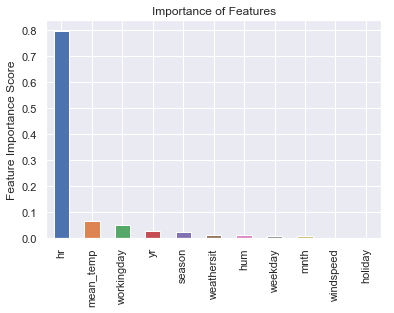

In [102]:
predictors=list(X_train_org)
feat_imp = pd.Series(gbr.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbr.score(X_test_org, y_test)))

In [103]:
# Number of boosting stages to perform
n_estimators = [int(x) for x in np.linspace(start = 30 , stop = 50, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider when looking for best split
max_features = ['auto', 'log2']
# Maximum depth of individual regression estimators
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
# The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# The function to measure the quality of a split
criterion = ['friedman_mse', 'mse', 'mae']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [5, 10],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [30, 50]}


In [104]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gbr_random.fit(X_train_org, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.8s finished


In [105]:
gbr_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [106]:
best_pred_gbr = best_random.predict(X_test_org)

In [107]:
print(metrics.mean_absolute_error(y_test, best_pred_gbr))                 # Mean Absolute Error
print(metrics.r2_score(y_test, best_pred_gbr))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, best_pred_gbr)))         # Root Mean Squared Error (RMSE)

0.19263239575160812
0.9232414310965378
0.2770533683308366


### Bagging Regressor

In [108]:
bgcl = BaggingRegressor()
bgcl.fit(X_train_org, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [109]:
pred_bgcl = bgcl.predict(X_test_org)

In [110]:
print(metrics.mean_absolute_error(y_test, pred_bgcl))                 # Mean Absolute Error
print(metrics.r2_score(y_test, pred_bgcl))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, pred_bgcl)))         # Root Mean Squared Error (RMSE)

0.16084401414542754
0.9392382756295579
0.2464989338119784


In [111]:
# The number of base estimators in the ensemble
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# The number of features to draw from X to train each base estimator
max_features = [8,9,10,11]
# Whether samples are drawn with replacement
bootstrap = [True]
# Whether to use out-of-bag samples to estimate the generalization error
oob_score = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap,
               'oob_score': oob_score}

pprint(random_grid)

{'bootstrap': [True],
 'max_features': [8, 9, 10, 11],
 'n_estimators': [10, 15],
 'oob_score': [True, False]}


In [112]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bag_random = RandomizedSearchCV(estimator=bgcl, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
bag_random.fit(X_train_org, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.5s finished


In [113]:
gbr_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [114]:
best_pred_bag = best_random.predict(X_test_org)

In [115]:
print(metrics.mean_absolute_error(y_test, best_pred_bag))                 # Mean Absolute Error
print(metrics.r2_score(y_test, best_pred_bag))                            # R-Squared
print(np.sqrt(metrics.mean_squared_error(y_test, best_pred_bag)))         # Root Mean Squared Error (RMSE)

0.19263239575160812
0.9232414310965378
0.2770533683308366
